# CS - 3. Common Algorithms - 3.5 Graph - 3.5.5 A* Algorithm

A* Algorithm
💡 A* is a graph traversal algorithm that is used to find the shortest path between two nodes in a graph. It is a modified version of Dijkstra’s algorithm that uses heuristics to find the shortest path. It is used in pathfinding and graph traversal.

A*는 그래프에서 두 노드 사이의 최단 경로를 찾는 데 사용되는 그래프 탐색 알고리즘입니다. 이는 휴리스틱을 사용하여 최단 경로를 찾는 Dijkstra 알고리즘의 수정 버전입니다. 경로 찾기 및 그래프 탐색에 사용됩니다.

A* (A Star) 알고리즘은, 그래프에서 시작 - 목표 노드의 최단 경로를 찾는 것이 목표인 알고리즘입니다.

A*는 다익스트라 알고리즘에 휴리스틱 함수를 추가적으로 사용해 탐색을 보다 효율적으로 수행합니다.

### 휴리스틱 함수란 무엇일까요?

문제 해결 과정에서 더 나은 결정을 내리기 위해 사용되는 추정 함수를 의미합니다.

주로 현재 상태에서 목표 상태까지의 비용을 추정하는 데 사용됩니다.

 

A* 알고리즘에서 휴리스틱 함수 h(n)은 현재 노드에서 목표노드까지의 추정 거리를 나타냅니다.

이렇게 하는 이유는, 더 빠르게 목표 노드에 도달하기 위해 탐색 경로를 안내하기 위해서입니다.

 

간단한 예시를 들어보겠습니다.

2차원 array에서 경로 찾기 문제를 생각해 볼수 있습니다.

휴리스틱 함수로 유클리드 거리( 두 점 사이의 직선 거리)를 사용할 수 있습니다.

(유클리드 거리, 맨해튼 거리, 해밍 거리 등 이 있습니다.)

현재 노드가 (1,2)이고 목표노드가 (4,3)이라면 휴리스틱 함수 h(n)은

h(n) = sqrt((4-1)^2 + (3-2)^2) 이라 할 수 있겠습니다.

 

이렇게 계산한 h(n)은 현재 노드에서 목표 노드 까지의 추정 거리를 나타냅니다.

이 값을 이용하여, A* 알고리즘은 가장 효율적인 탐색 경로를 결정하게 됩니다.

물론 이는 아주 간단한 문제고, 문제의 특성, 데이터의 특성에 따라 다르게 설정 될 수 있습니다.

## In Python

In [32]:
import heapq

# 휴리스틱 함수를 정의합니다. - 문제에 맞춰서 사용하면 됩니다. 여기서는 맨해튼 거리 사용
def heuristic(a, b):
    return abs(b[0] - a[0]) + abs(b[1] - a[1])

# A* 알고리즘 구현, 2차원배열(array), 시작노드(start), 목표노드(goal) 을 입력받음
def astar(array, start, goal):

    # 8 방향 이동을 위한 이웃 노드(neighbors)의 좌표 정의
    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]

    # 각종 변수 
    # close_set : 이미 방문한 노드의 집합, 
    # came_from : 각 노드의 이전 노드를 저장한 dict, 
    # gscroe : 시작노드 에서 각 노드까지의 실제 비용, 
    # fscore : gscore와 휴리스틱 함수를 통해 게산한 추정 비용의합, 
    # oheap : 방문할 노드들을 저장하는 우선순위 큐
    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []

    # 시작 노드를 우선순위 큐에 추가
    heapq.heappush(oheap, (fscore[start], start))
    
    #우선순위 큐가 빌떄까지(모든 노드 방문) 반복
    while oheap:

        #우선순위 큐에서 가장 낮은 비용의 노드 추출
        current = heapq.heappop(oheap)[1]

        #추출 노드가 목표 노드라면, 경로를 구성하고 반환
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data


        #추출한 노드를 방문한 노드의 집합에 추가
        close_set.add(current)
        
        #추출한 노드의 이웃노드에 대해 수행하는 것들
        for i, j in neighbors:
            
            #이웃 노드의 좌표를 계산
            neighbor = current[0] + i, current[1] + j
            
            #현재노드에서 이웃노드까지 비용 계산
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            
            # 이웃 노드가 그래프 내에 있는지, 장애물이 있는지, 이미 방문한 노드인지 확인, 이에 해당하면 이웃 노드를 방문하지 않고 건너뜀
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    continue
            else:
                continue
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
            
            # 이웃 노드의 총 비용이 현재까지 계산한 비용보다 작거나, 아직 방문하지 않은 노드라면 총 비용과 이전노드 갱신, 우선순위 큐에 추가        
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))
                
    return False


이렇게 A* 알고리즘을 구현해 보았습니다.

예시로 미로찾기를 해보겠습니다.

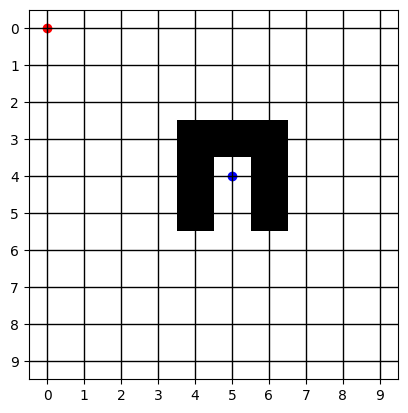

In [40]:
import matplotlib.pyplot as plt

nmap = np.array([
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,1,1,0,0,0],
    [0,0,0,0,1,0,1,0,0,0],
    [0,0,0,0,1,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0]
])
plt.imshow(nmap, cmap='binary')

plt.grid(True, which='both', color='black', linewidth=1)
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 10, 1))


# 빨간색 점을 추가합니다.
plt.scatter(0, 0, color='red')

# 파란색 점을 추가합니다.
plt.scatter(5, 4, color='blue')
plt.show()

이런 array 가 있다고 가정합시다.

빨간점(0,0) 에서 파란점(4,5) 까지의 최소 루트를 알고싶습니다.

(일반적인 x,y 데카르트 좌표평면이 아니라 array 를 구현한 좌표임을 감안해주세요.(차후수정))

In [38]:
print(astar(nmap, (0,0), (4,5)))

[(4, 5), (5, 5), (6, 4), (5, 3), (4, 2), (3, 1), (2, 0), (1, 0)]


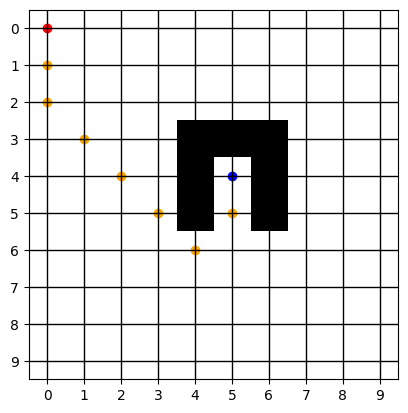

In [42]:
import matplotlib.pyplot as plt

nmap = np.array([
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,1,1,0,0,0],
    [0,0,0,0,1,0,1,0,0,0],
    [0,0,0,0,1,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0]
])
plt.imshow(nmap, cmap='binary')

plt.grid(True, which='both', color='black', linewidth=1)
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 10, 1))


# 빨간색 점을 추가합니다.
plt.scatter(0, 0, color='red')

# 파란색 점을 추가합니다.
plt.scatter(5, 4, color='blue')

points = [(5, 5), (6, 4), (5, 3), (4, 2), (3, 1), (2, 0), (1, 0)]
for point in points:
    plt.scatter(point[1], point[0], color='orange')

plt.show()

주황색 점을 이으면 빨간점과 파란점의 최소 비용 구간입니다.

### 활용
다익스트라 알고리즘과 A* 알고리즘은 최단 비용 거리를 탐색한다는 점은 비슷합니다.

하지만 다익스트라 알고리즘은 모든 노드를 검색하고, A*는 휴리스틱 함수를 활용해 좀더 효율적으로 찾을수 있게 됩니다.

 

이는 미로찾기에 활용하기 쉽고, 따라서 경로 계획, 게임 인공지능, 자율주행 등 다양한 분야에서 활용할 수 있습니다.